### Imports

In [1]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder

In [2]:
df = pd.read_csv('../All Data_Sets/Groceries_dataset.csv')
df.head()

,Cust ID,Date,Item Description
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [3]:
df['Item Description'].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: Item Description, Length: 167, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Item Description'>

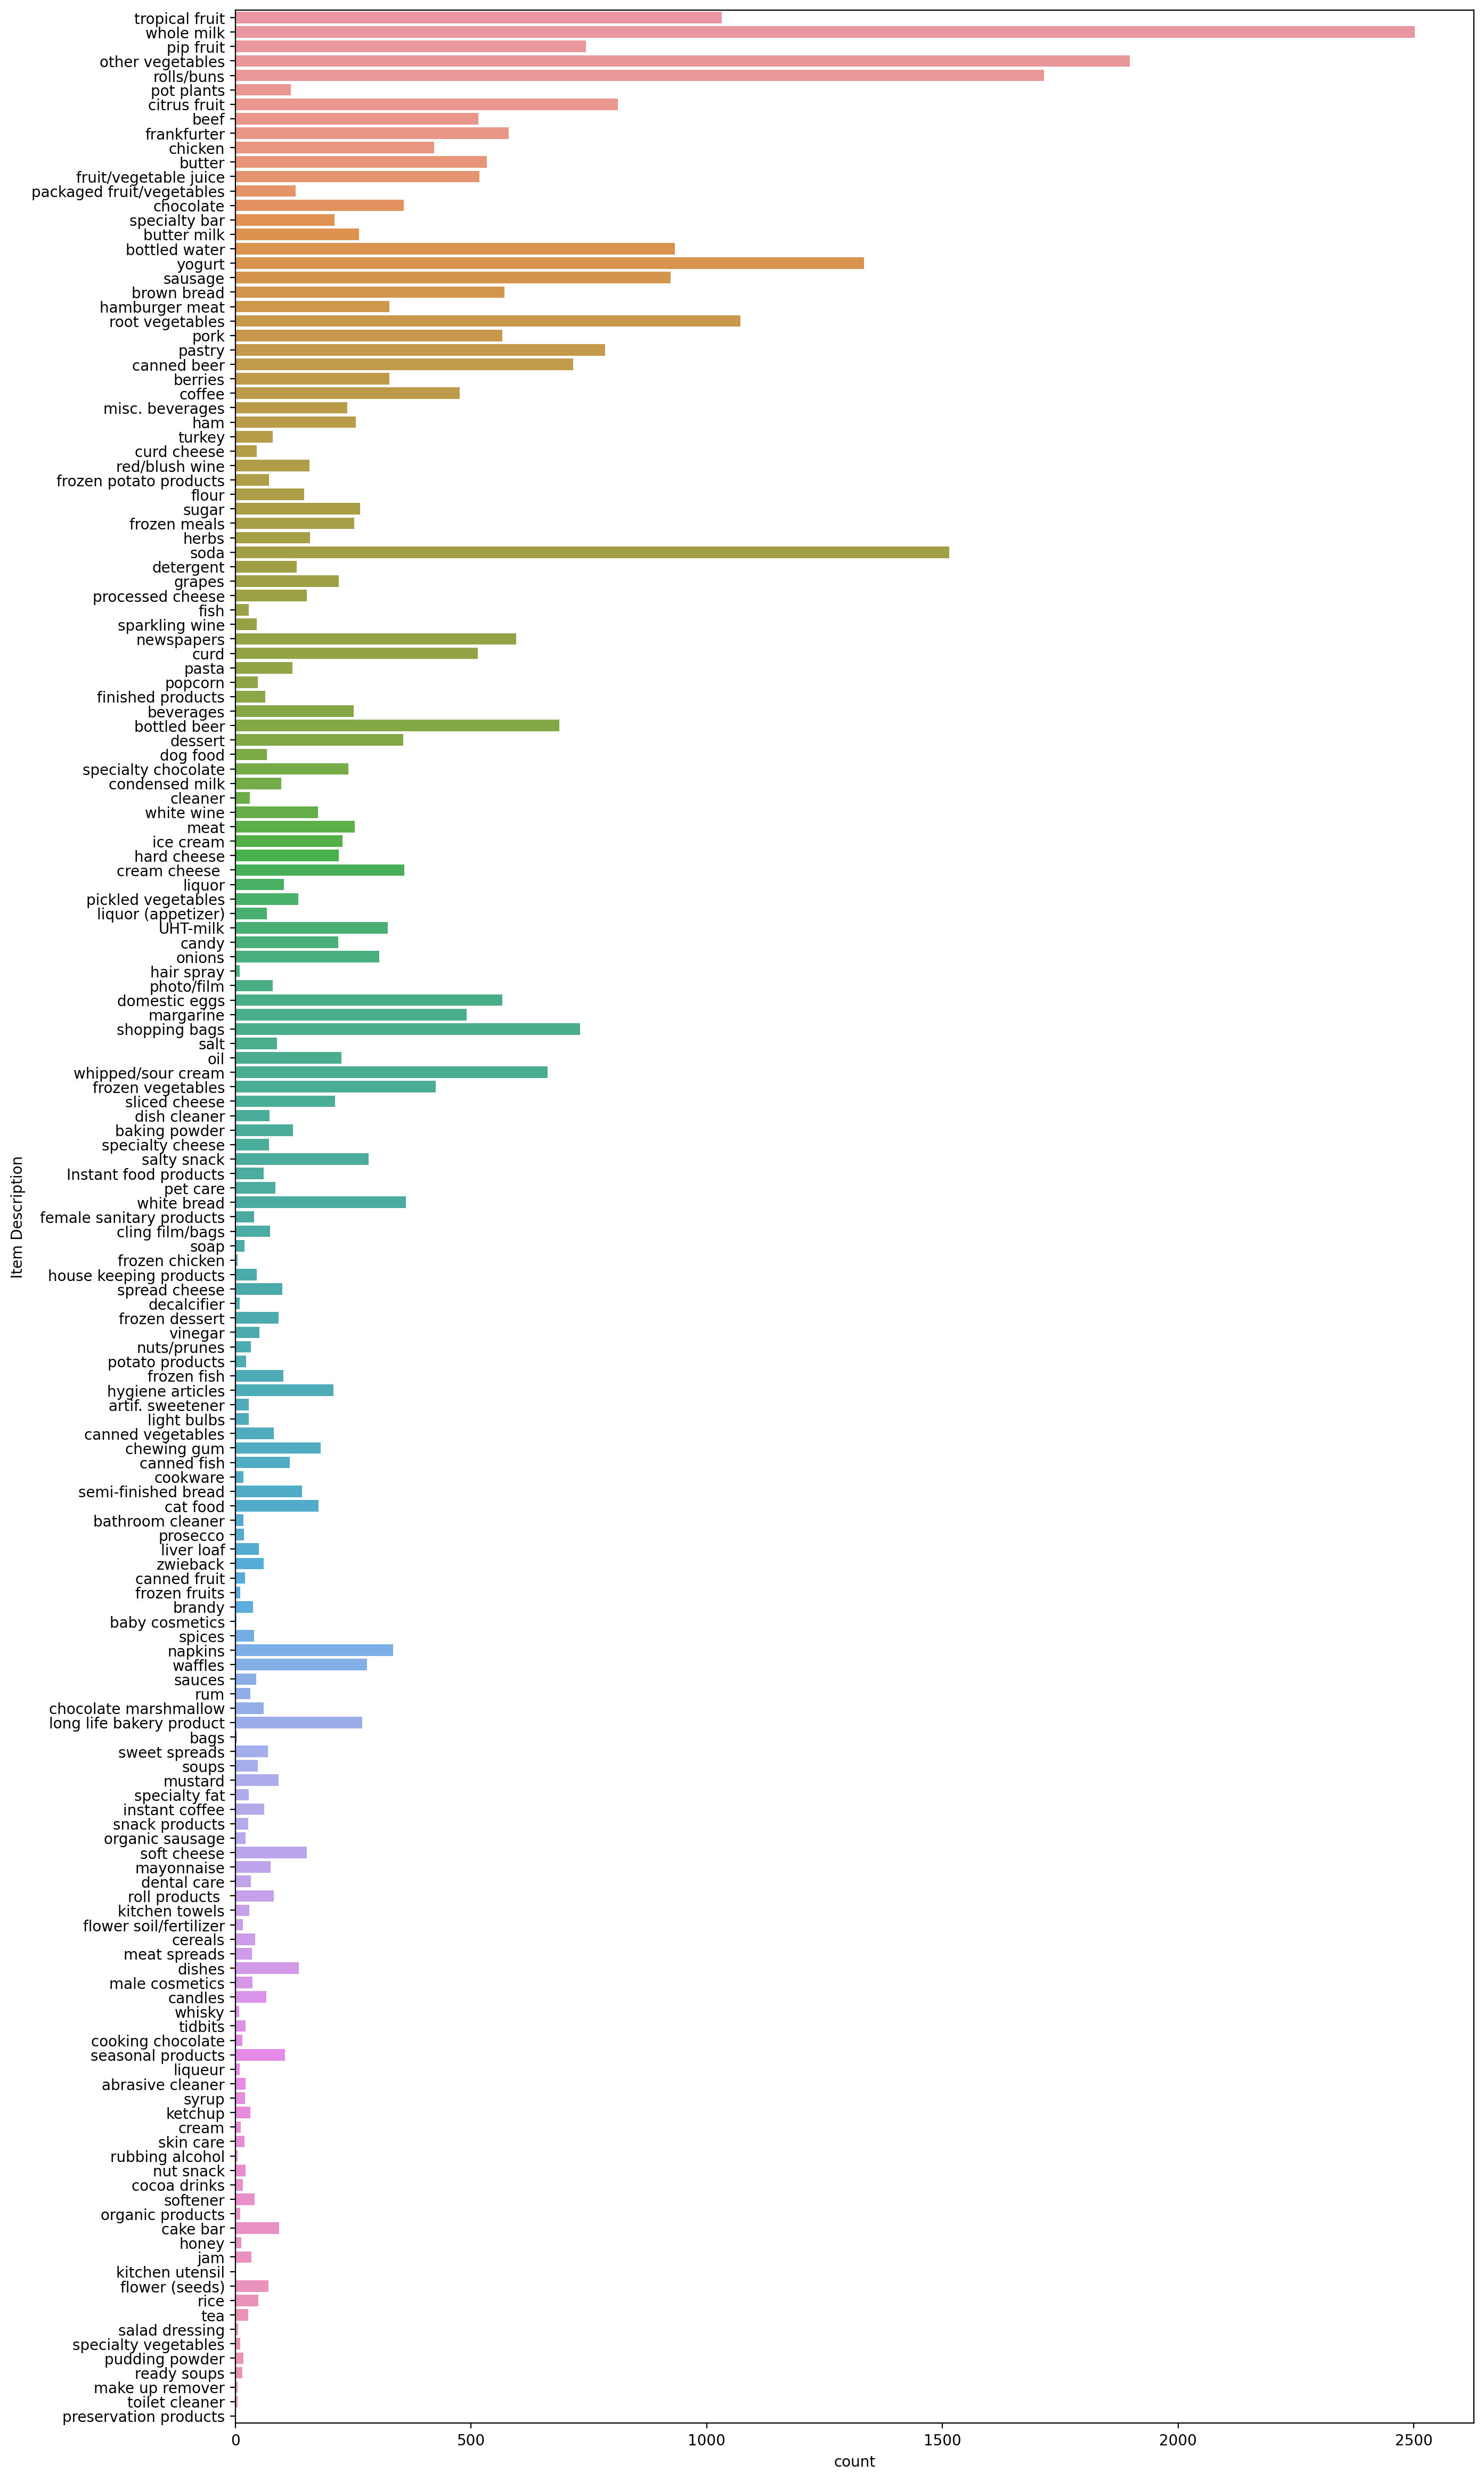

In [4]:
plt.figure(figsize=(15,30),dpi=200)
sns.countplot(y='Item Description', data=df)

In [5]:
X = df.drop('Date',axis=1)
X = X.sort_values(by='Cust ID').values
X

array([[1000, 'soda'],
       [1000, 'whole milk'],
       [1000, 'whole milk'],
       ...,
       [5000, 'bottled beer'],
       [5000, 'onions'],
       [5000, 'soda']], dtype=object)

In [41]:
n = 1000
items,trans = set(),[]
for i in range(38765):
    if(X[i,0] == n):
        items.add(X[i,1])
        n = X[i,0]
    else:
        trans.append(list(items))
        items = set()
        n = X[i,0]

In [42]:
trans[0]

['whole milk',
 'salty snack',
 'hygiene articles',
 'soda',
 'sausage',
 'semi-finished bread',
 'yogurt',
 'canned beer',
 'misc. beverages',
 'pickled vegetables',
 'pastry']

### Apriori Algorithm

In [44]:
te = TransactionEncoder()
te_ary = te.fit(trans).transform(trans)

In [45]:
df = pd.DataFrame(te_ary,columns=te.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,True,False,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [59]:
fq_itemsets = apriori(df, min_support=0.1, use_colnames=True)
fq_itemsets

,support,itemsets
0,0.110085,(beef)
1,0.142674,(bottled beer)
2,0.193739,(bottled water)
3,0.123428,(brown bread)
4,0.115987,(butter)
5,0.152938,(canned beer)
6,0.168591,(citrus fruit)
7,0.103669,(coffee)
8,0.109315,(curd)
9,0.117270,(domestic eggs)


In [63]:
res = association_rules(fq_itemsets,metric='confidence',min_threshold=0.4)
res

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(rolls/buns),(other vegetables),0.318450,0.344111,0.128304,0.402901,1.170846,0.018722,1.098459
1,(other vegetables),(whole milk),0.344111,0.419810,0.167308,0.486204,1.158153,0.022847,1.129223
2,(yogurt),(other vegetables),0.261740,0.344111,0.106749,0.407843,1.185209,0.016681,1.107627
3,(rolls/buns),(whole milk),0.318450,0.419810,0.157814,0.495568,1.180458,0.024125,1.150185
4,(soda),(whole milk),0.280985,0.419810,0.128560,0.457534,1.089860,0.010600,1.069542
5,(tropical fruit),(whole milk),0.212215,0.419810,0.103413,0.487304,1.160771,0.014323,1.131644
6,(yogurt),(whole milk),0.261740,0.419810,0.133693,0.510784,1.216703,0.023812,1.185959
